In [40]:
import pandas as pd
import numpy as np


In [41]:
data ={
    "Student_id":[1,2,3,4,5,5,6,7],
    "Name": ["Alice","Bob","Carlie","Davide","Eva","Eva","Frank",None],
    "Attendece": [85,None,78,92,88,88,95,80],
    "Assignment_Score": [75,80,np.nan,90,85,85,95,200],
    "Final_Grade":["B","A","C","A",None,None,"A","B"]
    }

In [42]:
df = pd.DataFrame(data)
print(df)

   Student_id    Name  Attendece  Assignment_Score Final_Grade
0           1   Alice       85.0              75.0           B
1           2     Bob        NaN              80.0           A
2           3  Carlie       78.0               NaN           C
3           4  Davide       92.0              90.0           A
4           5     Eva       88.0              85.0        None
5           5     Eva       88.0              85.0        None
6           6   Frank       95.0              95.0           A
7           7    None       80.0             200.0           B


##### Check for missing values

In [43]:
print(df.isnull().sum())

Student_id          0
Name                1
Attendece           1
Assignment_Score    1
Final_Grade         2
dtype: int64


##### Display only rows that have missing valuea

In [44]:
missing_rows = df[df.isnull().any(axis=1)] 
print(missing_rows)

   Student_id    Name  Attendece  Assignment_Score Final_Grade
1           2     Bob        NaN              80.0           A
2           3  Carlie       78.0               NaN           C
4           5     Eva       88.0              85.0        None
5           5     Eva       88.0              85.0        None
7           7    None       80.0             200.0           B


### Handeling Missing Values

##### Fill missing Attendence with mean value

In [45]:
df['Attendece'] = df['Attendece'].fillna(df['Attendece'].mean())


In [46]:
print(df)

   Student_id    Name  Attendece  Assignment_Score Final_Grade
0           1   Alice  85.000000              75.0           B
1           2     Bob  86.571429              80.0           A
2           3  Carlie  78.000000               NaN           C
3           4  Davide  92.000000              90.0           A
4           5     Eva  88.000000              85.0        None
5           5     Eva  88.000000              85.0        None
6           6   Frank  95.000000              95.0           A
7           7    None  80.000000             200.0           B


##### Replace missing values in Final_Grade with Unkown

In [47]:
df['Final_Grade'] = df['Final_Grade'].fillna("Unkown")

In [48]:
print(df)

   Student_id    Name  Attendece  Assignment_Score Final_Grade
0           1   Alice  85.000000              75.0           B
1           2     Bob  86.571429              80.0           A
2           3  Carlie  78.000000               NaN           C
3           4  Davide  92.000000              90.0           A
4           5     Eva  88.000000              85.0      Unkown
5           5     Eva  88.000000              85.0      Unkown
6           6   Frank  95.000000              95.0           A
7           7    None  80.000000             200.0           B


##### Drop rows where Name is missing


In [49]:
df.dropna(subset=["Name"], inplace=True)

In [55]:
print(df)

   Student_id    Name  Attendece  Assignment_Score Final_Grade
0           1   Alice  85.000000              75.0           B
1           2     Bob  86.571429              80.0           A
2           3  Carlie  78.000000               NaN           C
3           4  Davide  92.000000              90.0           A
4           5     Eva  88.000000              85.0      Unkown
6           6   Frank  95.000000              95.0           A


### Handling Duplicates 

##### Check duplicate rows

In [50]:
duplicates= df.duplicated()
print("Duplicate rows",df[duplicates])

Duplicate rows    Student_id Name  Attendece  Assignment_Score Final_Grade
5           5  Eva       88.0              85.0      Unkown


##### remove duplicate rows

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
print(df)

   Student_id    Name  Attendece  Assignment_Score Final_Grade
0           1   Alice  85.000000              75.0           B
1           2     Bob  86.571429              80.0           A
2           3  Carlie  78.000000               NaN           C
3           4  Davide  92.000000              90.0           A
4           5     Eva  88.000000              85.0      Unkown
6           6   Frank  95.000000              95.0           A


### Detecting Outliers

##### Discrbe the data set statistic

In [53]:
print(df.describe())

       Student_id  Attendece  Assignment_Score
count    6.000000   6.000000          5.000000
mean     3.500000  87.428571         85.000000
std      1.870829   5.900536          7.905694
min      1.000000  78.000000         75.000000
25%      2.250000  85.392857         80.000000
50%      3.500000  87.285714         85.000000
75%      4.750000  91.000000         90.000000
max      6.000000  95.000000         95.000000


##### Identifying the outliers using IQR

In [56]:
numcols = df.select_dtypes(include='number')
print(numcols)
q1 = numcols.quantile(0.25)
q3 = numcols.quantile(0.75)
IQR = q3 - q1

outliars = ((numcols< (q1 - 1.5*IQR)) | (numcols> (q3+ 1.5*IQR))) 
print(df[outliars.any(axis=1)])

   Student_id  Attendece  Assignment_Score
0           1  85.000000              75.0
1           2  86.571429              80.0
2           3  78.000000               NaN
3           4  92.000000              90.0
4           5  88.000000              85.0
6           6  95.000000              95.0
Empty DataFrame
Columns: [Student_id, Name, Attendece, Assignment_Score, Final_Grade]
Index: []


In [57]:
df_no_outliars = df[~outliars.any(axis=1)]

In [58]:
df

,Student_id,Name,Attendece,Assignment_Score,Final_Grade
0,1,Alice,85.000000,75.0,B
1,2,Bob,86.571429,80.0,A
2,3,Carlie,78.000000,NaN,C
3,4,Davide,92.000000,90.0,A
4,5,Eva,88.000000,85.0,Unkown
6,6,Frank,95.000000,95.0,A


### Visualizing

In [60]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

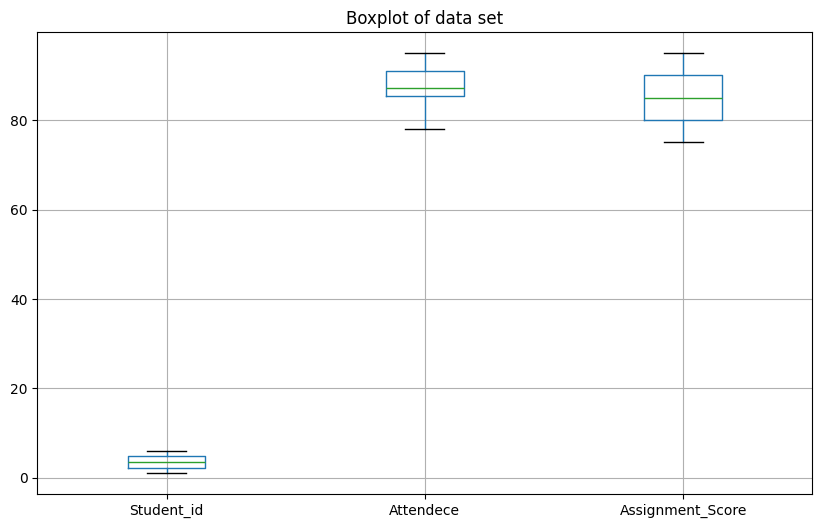

In [61]:
df.boxplot(figsize=(10,6))
plt.title("Boxplot of data set")
plt.show

#### What are missing values and how can we handle them
##### Missing values are missing or null entries of a data set
- Fill with mea, meadian, mode
- Fill witha Placholder like " unkwon"
- drop rows that have too many missing values

#### Why should we remove duplicates
When removing duplitace it prevents 
- Misleading Analysis Duplicate records can inflate counts, distort averages, and misrepresent trends—leading to conclusions that don’t reflect reality.
- Model Overfitting In machine learning, repeated data points can cause models to memorize rather than generalize, reducing their accuracy on new data.
- Unnecessary Processing Time More data means more computation. Duplicates slow down queries, increase memory usage, and complicate workflows.
- Data Integrity Issues Especially in databases, duplicates can violate uniqueness constraints, cause errors in joins, and lead to inconsistent reporting.
- Redundant Storage Costs Storing the same data multiple times wastes disk space and can drive up costs in cloud environments.

#### Why is outlier deletion is important 
- Outliers can skew result, mislead analysis and efect machine learning accuracy

In [62]:
df

,Student_id,Name,Attendece,Assignment_Score,Final_Grade
0,1,Alice,85.000000,75.0,B
1,2,Bob,86.571429,80.0,A
2,3,Carlie,78.000000,NaN,C
3,4,Davide,92.000000,90.0,A
4,5,Eva,88.000000,85.0,Unkown
6,6,Frank,95.000000,95.0,A
